In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

In [2]:
input_file = '/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/L7_FLERCNN_true/prediction_values_inputs_14_100files.hdf5'

### Import Files ###
f = h5py.File(input_file, 'r')
features_DC = f['features_DC'][:]
features_IC = f['features_IC'][:]
labels = f['Y_test_use'][:]
cnn = f['Y_predicted'][:]
all_weights = f['weights_test'][:]
f.close()
del f

In [3]:
print(features_DC.shape)
print(features_IC.shape)

(284184, 8, 60, 5)
(284184, 19, 60, 5)


In [4]:
weights = all_weights[:,8]/100.
true_energy = labels[:,0]
cnn_energy = cnn[:,0]

In [5]:
true_1015 = np.logical_and(true_energy > 10, true_energy < 15)
cnn_815 = np.logical_and(cnn_energy > 8, cnn_energy < 15)
cnn_lt8 = cnn_energy < 8

In [6]:
mask_hits_DC = features_DC[:,:,:,0] > 0
mask_hits_IC1 = features_IC[:,:9,:,0] > 0 
mask_hits_IC2 = features_IC[:,10:,:,0] > 0 
mask_hits_36 = features_IC[:,9,:,0] > 0 

In [7]:
mask_hits_IC = np.concatenate((mask_hits_IC1, mask_hits_IC2),axis=1)

In [8]:
print(mask_hits_DC.shape)
print(mask_hits_IC.shape)
print(mask_hits_36.shape)
print(mask_hits_DC[0,2,:])

(284184, 8, 60)
(284184, 18, 60)
(284184, 60)
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [9]:
# hits per event
number_hits_DC = np.sum(mask_hits_DC,axis=(1,2))
number_hits_IC = np.sum(mask_hits_IC,axis=(1,2))
number_hits_36 = np.sum(mask_hits_36,axis=1)

In [10]:
strings_hit_DC = np.sum(mask_hits_DC,axis=(2)) > 0
strings_hit_IC = np.sum(mask_hits_IC,axis=(2)) > 0
strings_hit_36 = np.sum(mask_hits_36,axis=(1)) > 0 
sum_strings_hit_DC = np.sum(strings_hit_DC,axis=(1))
sum_strings_hit_IC = np.sum(strings_hit_IC,axis=(1))
sum_strings_hit_36 = np.array(strings_hit_36,dtype=int)

In [11]:
print(sum_strings_hit_DC[:10],sum_strings_hit_36[:10])

[2 3 5 3 5 4 2 3 4 1] [0 1 0 0 0 0 0 1 1 0]


In [19]:
isCC = np.array(labels[:,11]) == 1

In [12]:
charge_DC = features_DC[:,:,:,0]
charge_IC = np.concatenate((features_IC[:,:9,:,0],features_IC[:,10:,:,0]),axis=1)
charge_36 = features_IC[:,9,:,0]

In [13]:
charge_sum_DC = np.sum(charge_DC,axis=(1,2))
charge_sum_IC = np.sum(charge_IC,axis=(1,2))
charge_sum_36 = np.sum(charge_36,axis=(1))

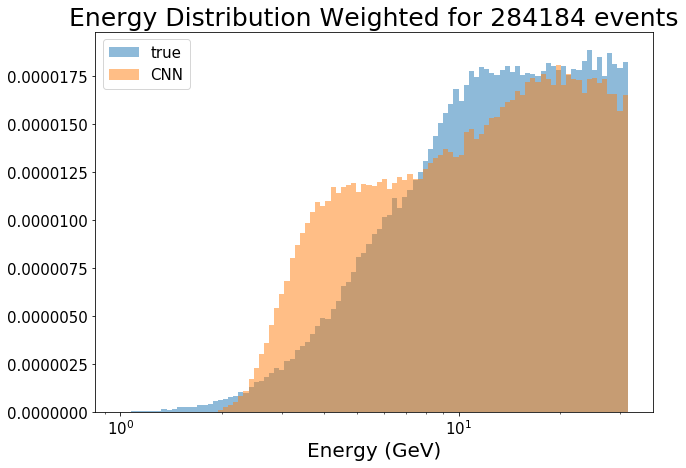

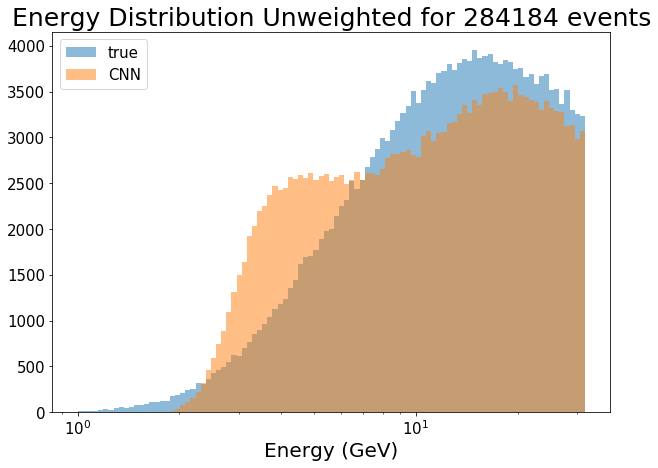

In [14]:
#bins=200
bins = 10**np.linspace(0,1.5,100)
amin=0
amax = 15
plt.figure(figsize=(10,7))
plt.hist(true_energy, label="true",bins=bins,range=[amin,amax],weights=weights,alpha=0.5)
plt.hist(cnn_energy, label="CNN",bins=bins,range=[amin,amax],weights=weights,alpha=0.5)
#plt.yscale("log")
plt.xscale('log')
plt.title("Energy Distribution Weighted for %s events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Energy (GeV)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(true_energy, label="true",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(cnn_energy, label="CNN",bins=bins,range=[amin,amax],alpha=0.5)
#plt.yscale("log")
plt.xscale('log')
plt.title("Energy Distribution Unweighted for %s events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Energy (GeV)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

0


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text yticklabel objects>)

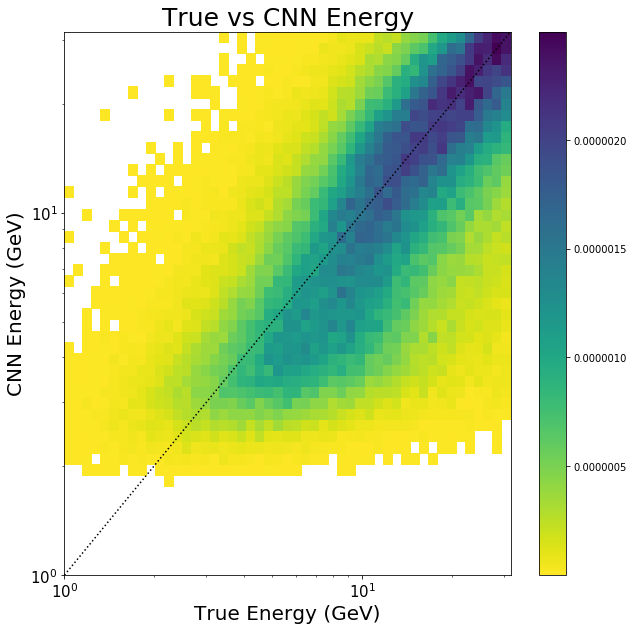

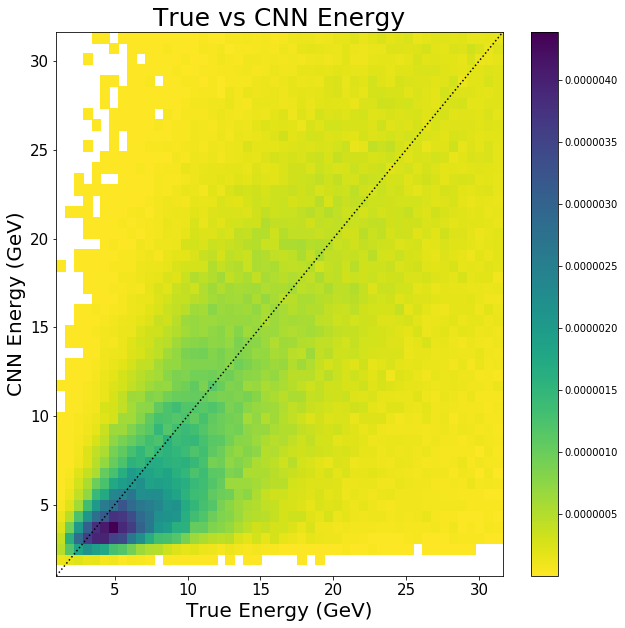

In [15]:
bins = 10**np.linspace(0,1.5,50)
#amin = 1
#amax = 10**2.7
#bins = 50
amin = 1
amax = 10**1.5
print(sum(weights<0))
plt.figure(figsize=(10,10))
plt.title("True vs CNN Energy",fontsize=25)
log_true_energy = np.log10(true_energy)
log_cnn_energy = np.log10(cnn_energy)
plt.hist2d(true_energy,cnn_energy,weights=weights,bins=bins,cmap='viridis_r',range=[[amin,amax],[amin,amax]],cmin=1e-12) #,norm=colors.LogNorm())
cbat = plt.colorbar()
plt.yscale('log')
plt.xscale('log')
plt.ylabel("CNN Energy (GeV)",fontsize=20)
plt.xlabel("True Energy (GeV)",fontsize=20)
plt.plot([amin,amax],[amin,amax],'k:',label="1:1")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

bins=50
amin = 1
amax = 10**1.5
plt.figure(figsize=(10,10))
plt.title("True vs CNN Energy",fontsize=25)
plt.hist2d(true_energy,cnn_energy,weights=weights,bins=bins,cmap='viridis_r',range=[[amin,amax],[amin,amax]],cmin=1e-12) #,norm=colors.LogNorm())
cbat = plt.colorbar()
plt.ylabel("CNN Energy (GeV)",fontsize=20)
plt.xlabel("True Energy (GeV)",fontsize=20)
plt.plot([amin,amax],[amin,amax],'k:',label="1:1")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text yticklabel objects>)

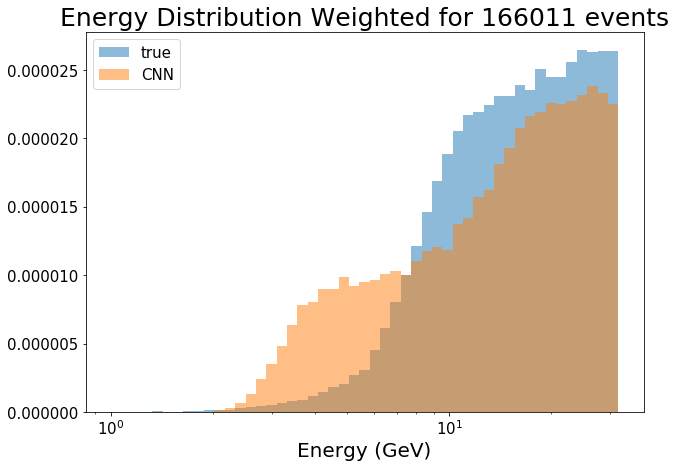

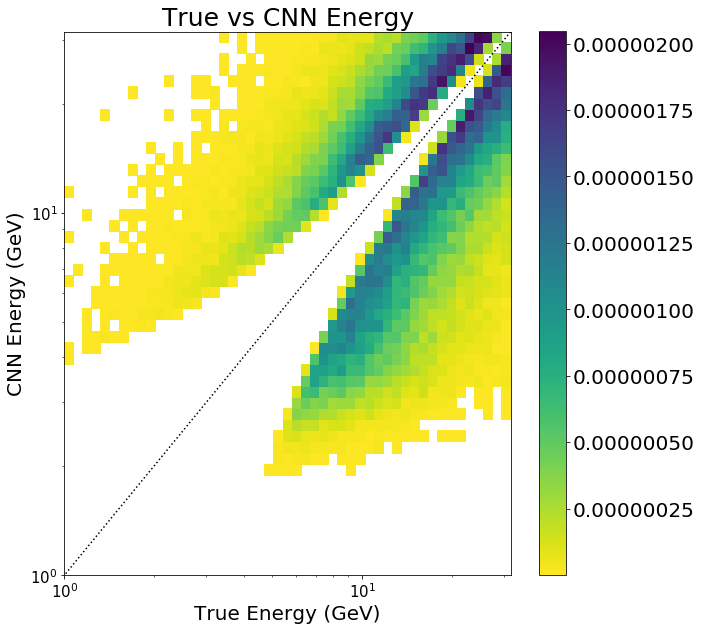

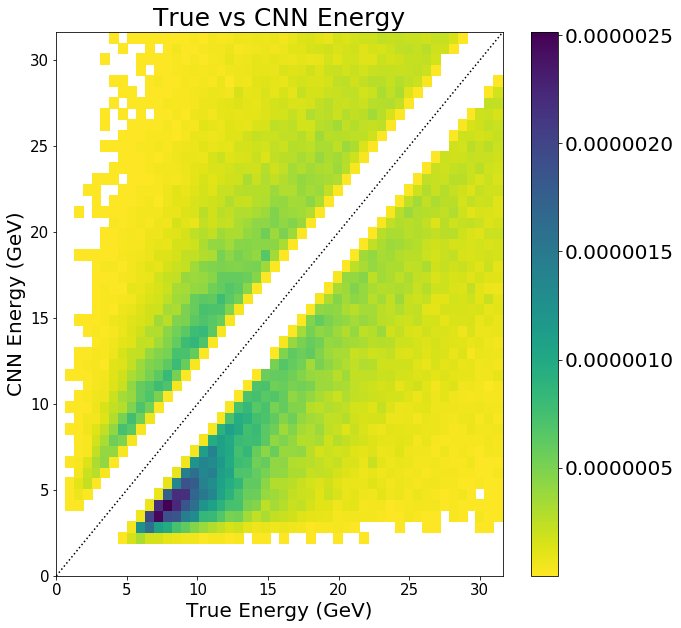

In [22]:
error_mask = abs(true_energy - cnn_energy) > 3
#mask = np.array(labels[:,11]) == 1
mask = error_mask & isCC

bins = 10**np.linspace(0,1.5,50)
amin=0
amax = 10**1.5
plt.figure(figsize=(10,7))
plt.hist(true_energy[mask], label="true",bins=bins,range=[amin,amax],weights=weights[mask],alpha=0.5)
plt.hist(cnn_energy[mask], label="CNN",bins=bins,range=[amin,amax],weights=weights[mask],alpha=0.5)
#plt.yscale("log")
plt.xscale('log')
plt.title("Energy Distribution Weighted for %s events"%sum(mask),fontsize=25)
plt.xlabel("Energy (GeV)",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,10))
plt.title("True vs CNN Energy",fontsize=25)
plt.hist2d(true_energy[mask],cnn_energy[mask],weights=weights[mask],bins=bins,cmap='viridis_r',range=[[amin,amax],[amin,amax]],cmin=1e-12) #,norm=colors.LogNorm())
cbat = plt.colorbar()
plt.yscale('log')
plt.xscale('log')
plt.ylabel("CNN Energy (GeV)",fontsize=20)
plt.xlabel("True Energy (GeV)",fontsize=20)
plt.plot([amin,amax],[amin,amax],'k:',label="1:1")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

bins = 50
plt.figure(figsize=(10,10))
plt.title("True vs CNN Energy",fontsize=25)
plt.hist2d(true_energy[mask],cnn_energy[mask],weights=weights[mask],bins=bins,cmap='viridis_r',range=[[amin,amax],[amin,amax]],cmin=1e-12) #,norm=colors.LogNorm())
cbat = plt.colorbar()
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel("CNN Energy (GeV)",fontsize=20)
plt.xlabel("True Energy (GeV)",fontsize=20)
plt.plot([amin,amax],[amin,amax],'k:',label="1:1")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [17]:
from PlottingFunctions import plot_bin_slices
bins = 10**np.linspace(0,2,100)
a_mask = true_energy > 0 && isCC

plot_bin_slices(true_energy[a_mask], cnn_energy[a_mask],
                        weights=weights[a_mask],
                        vs_predict = False,use_fraction = True,
                        bins=100,
                        min_val=1, max_val=10**2,
                        save=True,savefolder="/mnt/home/micall12/LowEnergyNeuralNetwork/data_check/",
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC")

plot_bin_slices(true_energy[a_mask], cnn_energy[a_mask],
                        weights=weights[a_mask],
                        vs_predict = False,use_fraction = True,
                        specific_bins=bins,savefolder="/mnt/home/micall12/LowEnergyNeuralNetwork/data_check/",
                        min_val=1, max_val=10**1.5,
                        save=True,xlog = True,
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC")

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


In [18]:
plot_bin_slices(true_energy[a_mask], cnn_energy[a_mask],
                        weights=weights[a_mask],
                        vs_predict = False,use_fraction = False,
                        bins=50,
                        min_val=1, max_val=10**1.5,
                        save=True,savefolder="/mnt/home/micall12/LowEnergyNeuralNetwork/data_check/",
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC")

plot_bin_slices(true_energy[a_mask], cnn_energy[a_mask],
                        weights=weights[a_mask],
                        vs_predict = False,use_fraction = False,
                        specific_bins=bins,savefolder="/mnt/home/micall12/LowEnergyNeuralNetwork/data_check/",
                        min_val=1, max_val=10**1.5,
                        save=True,xlog = True,
                        variable="Energy", units="(GeV)",
                        flavor="NuMu",sample="CC")

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]), <a list of 9 Text yticklabel objects>)

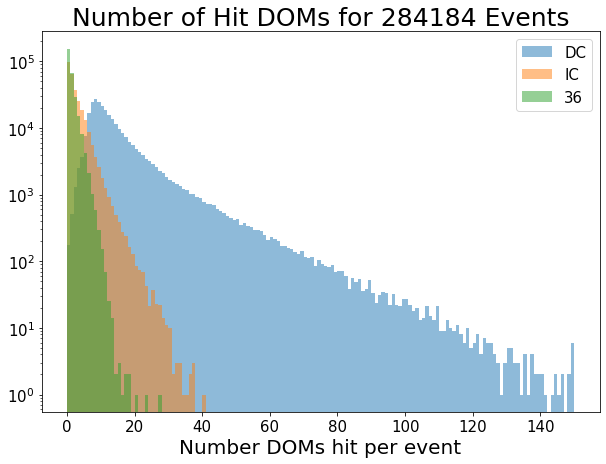

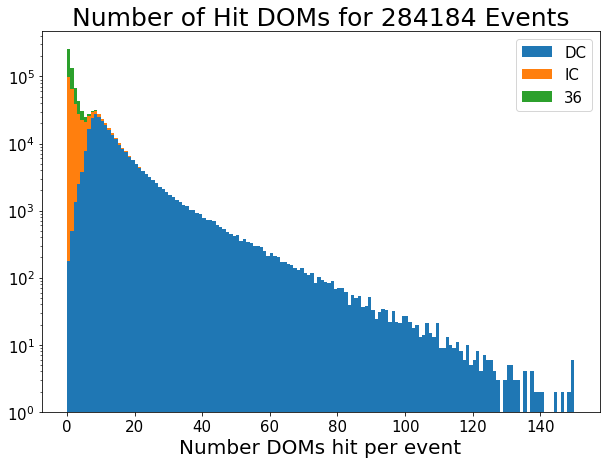

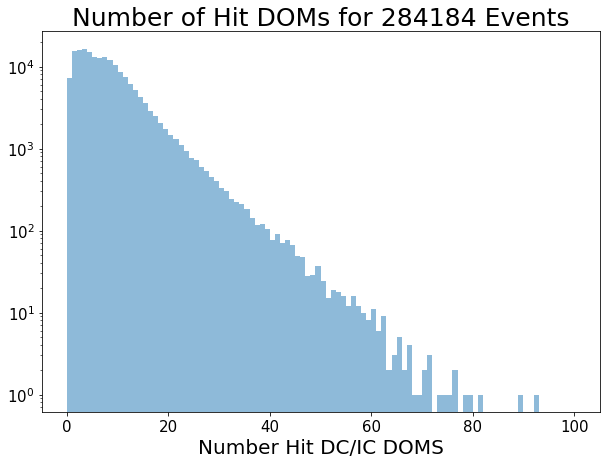

In [22]:
bins=150
amin=0
amax = 150
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC, label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC, label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36, label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("Number of Hit DOMs for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((number_hits_DC,number_hits_IC,number_hits_36), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("Number of Hit DOMs for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(number_hits_DC/number_hits_IC, label="DC",bins=100,range=[amin,100],alpha=0.5)
#plt.hist(number_hits_36, label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("Number of Hit DOMs for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Number Hit DC/IC DOMS",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=15)

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


(array([1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
 <a list of 5 Text yticklabel objects>)

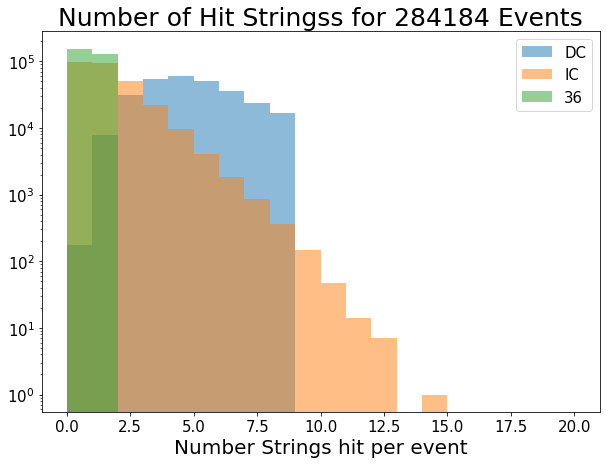

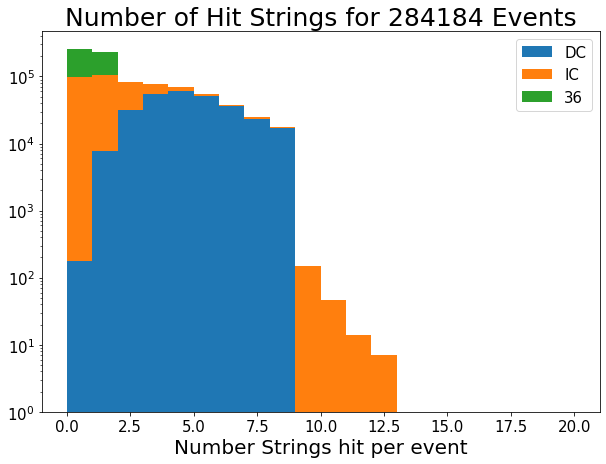

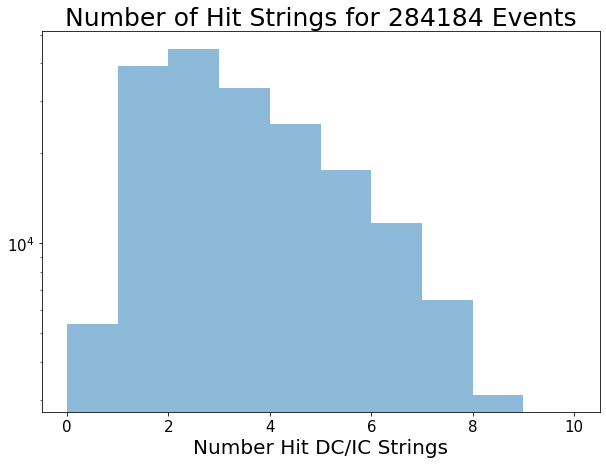

In [23]:
bins=20
amin=0
amax = 20
plt.figure(figsize=(10,7))
plt.hist(sum_strings_hit_DC, label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(sum_strings_hit_IC, label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(sum_strings_hit_36, label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("Number of Hit Stringss for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Number Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((sum_strings_hit_DC,sum_strings_hit_IC,sum_strings_hit_36), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("Number of Hit Strings for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Number Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(sum_strings_hit_DC/sum_strings_hit_IC, label="DC",bins=10,range=[amin,10],alpha=0.5)
#plt.hist(number_hits_36, label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("Number of Hit Strings for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Number Hit DC/IC Strings",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=15)

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]), <a list of 9 Text yticklabel objects>)

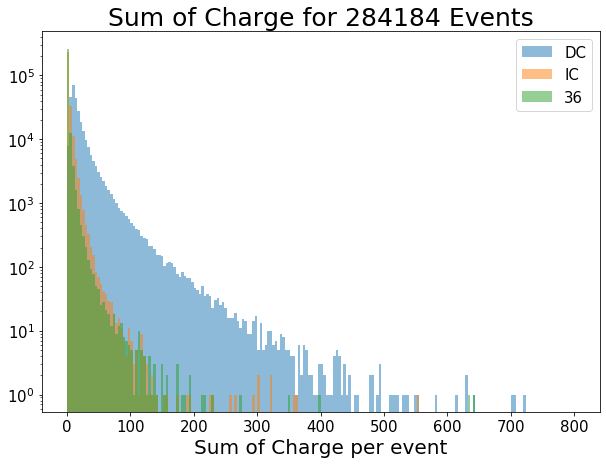

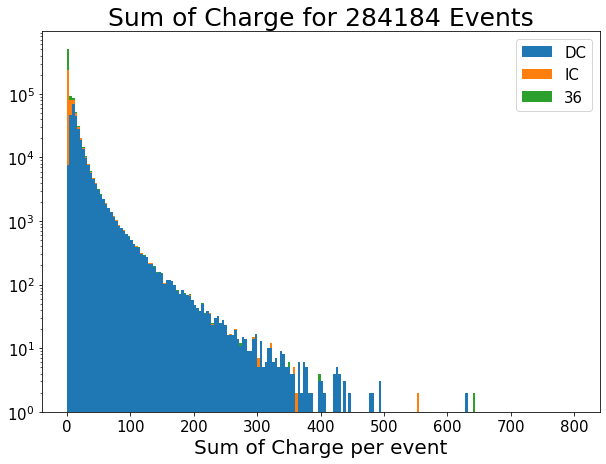

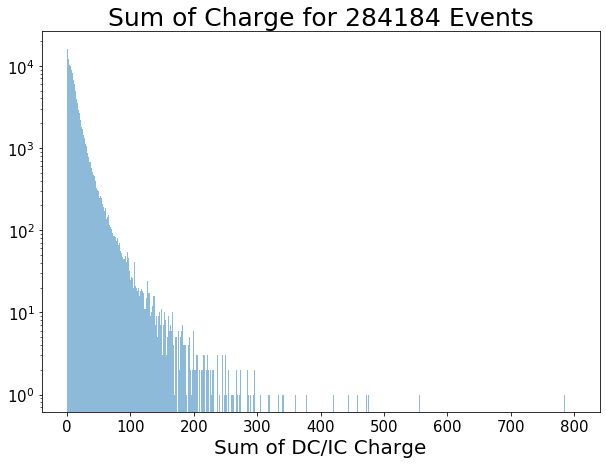

In [25]:
bins=200
amin=0
amax = 800
plt.figure(figsize=(10,7))
plt.hist(charge_sum_DC, label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(charge_sum_IC, label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(charge_sum_36, label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("Sum of Charge for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((charge_sum_DC,charge_sum_IC,charge_sum_36), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("Sum of Charge for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(charge_sum_DC/charge_sum_IC, label="DC",bins=800,range=[amin,800],alpha=0.5)
#plt.hist(number_hits_36, label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("Sum of Charge for %i Events"%len(number_hits_DC),fontsize=25)
plt.xlabel("Sum of DC/IC Charge",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=15)

# True Energy 10-15 GeV

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


43081

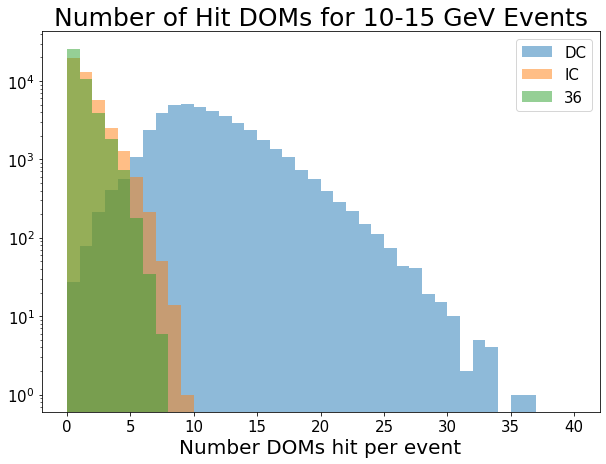

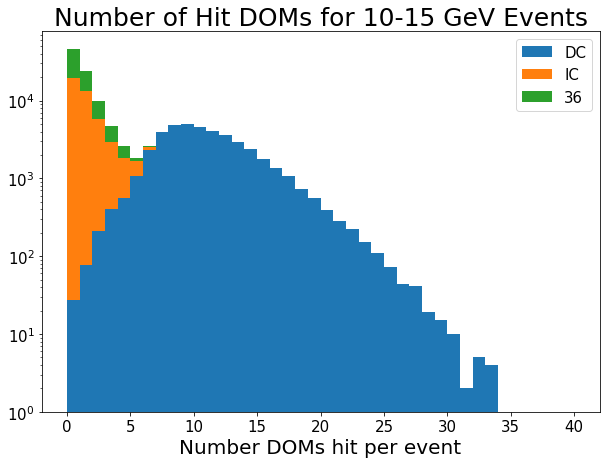

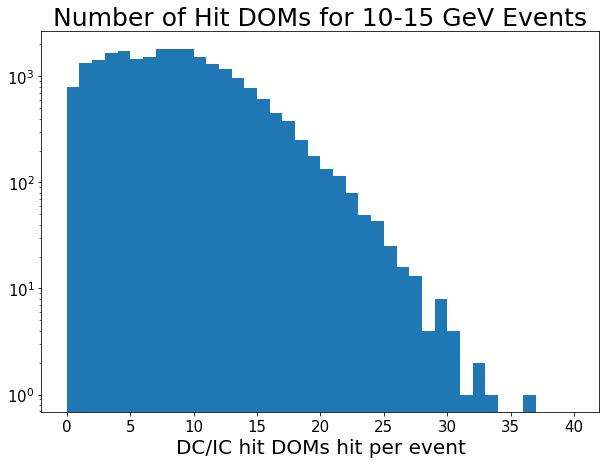

In [28]:
mask = true_1015
title="Number of Hit DOMs for 10-15 GeV Events"
bins=40
amin=0
amax = 40
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((number_hits_DC[mask],number_hits_IC[mask],number_hits_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask]/number_hits_IC[mask],bins=40,range=[amin,40],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("DC/IC hit DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=15)

sum(mask)

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


(array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 5 Text yticklabel objects>)

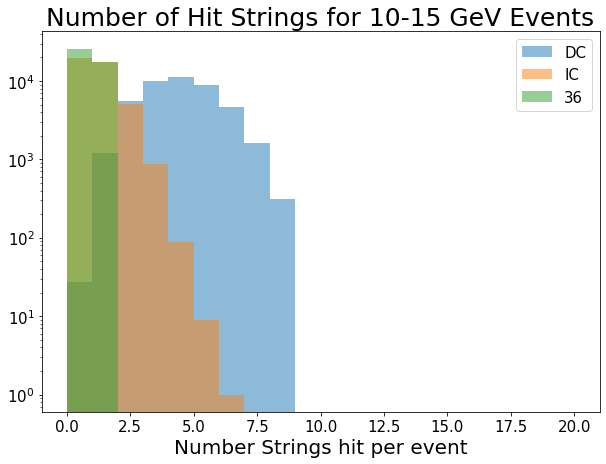

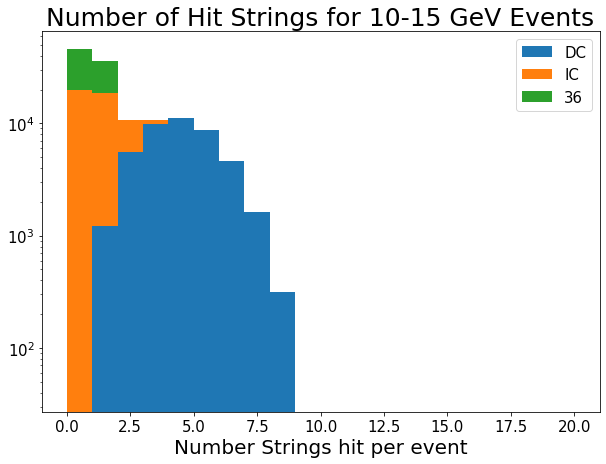

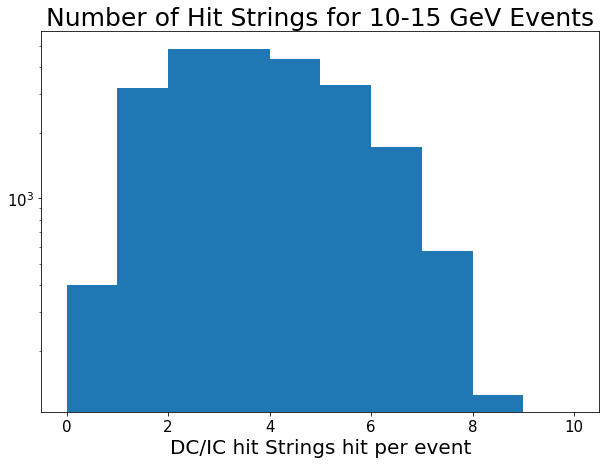

In [29]:
mask = true_1015
title="Number of Hit Strings for 10-15 GeV Events"
bins=20
amin=0
amax = 20
plt.figure(figsize=(10,7))
plt.hist(sum_strings_hit_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(sum_strings_hit_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(sum_strings_hit_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((sum_strings_hit_DC[mask],sum_strings_hit_IC[mask],sum_strings_hit_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(sum_strings_hit_DC[mask]/sum_strings_hit_IC[mask],bins=10,range=[amin,10],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("DC/IC hit Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=15)

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 8 Text yticklabel objects>)

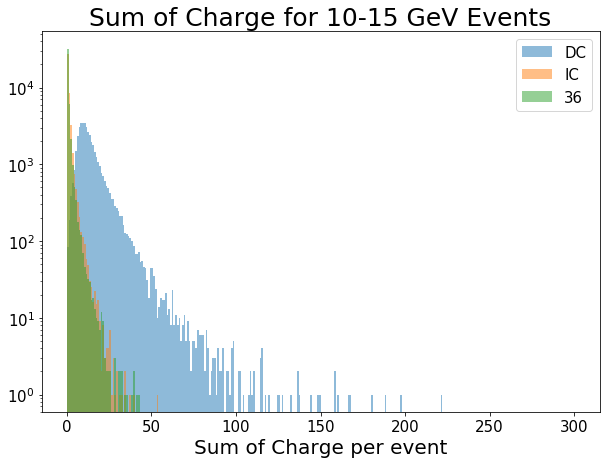

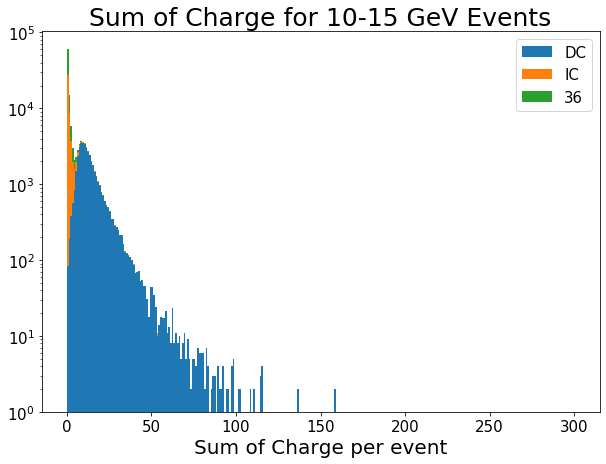

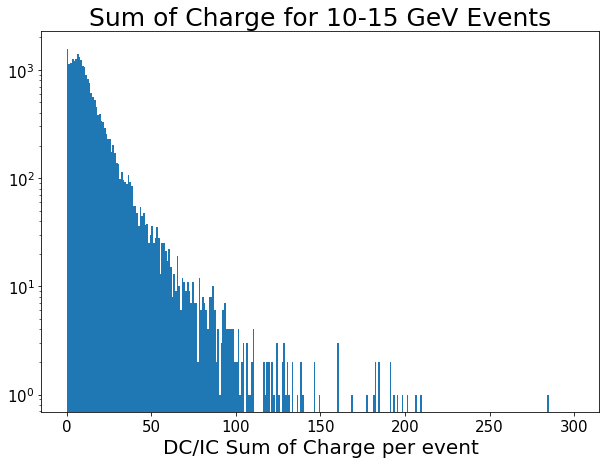

In [32]:
mask = true_1015
title="Sum of Charge for 10-15 GeV Events"
bins=300
amin=0
amax = 300
plt.figure(figsize=(10,7))
plt.hist(charge_sum_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(charge_sum_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(charge_sum_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((charge_sum_DC[mask],charge_sum_IC[mask],charge_sum_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(charge_sum_DC[mask]/charge_sum_IC[mask],bins=300,range=[amin,300],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("DC/IC Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=15)

# True Energy 8-15 GeV and CNN 8-15 GeV

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
No handles with labels found to put in legend.


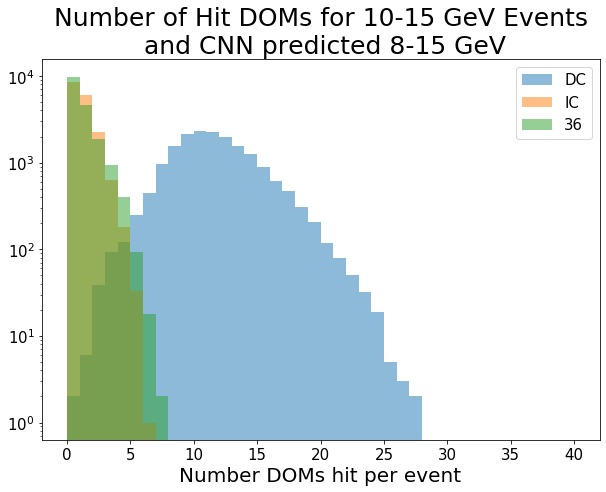

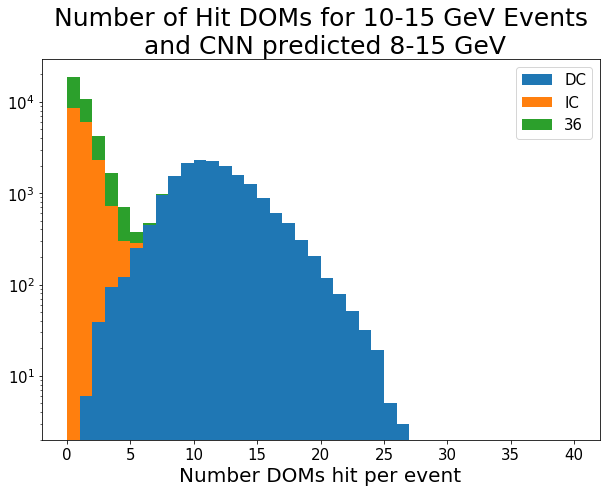

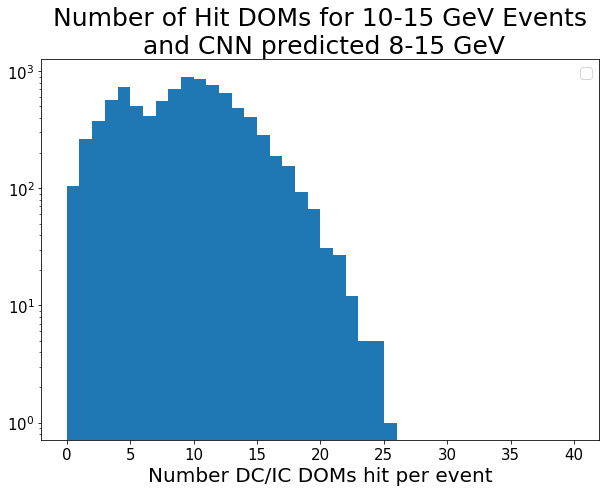

In [34]:
mask = true_1015 & cnn_815
title="Number of Hit DOMs for 10-15 GeV Events\n and CNN predicted 8-15 GeV"
bins=40
amin=0
amax = 40
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((number_hits_DC[mask],number_hits_IC[mask],number_hits_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask]/number_hits_IC[mask],bins=40,range=[amin,40],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DC/IC DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
No handles with labels found to put in legend.


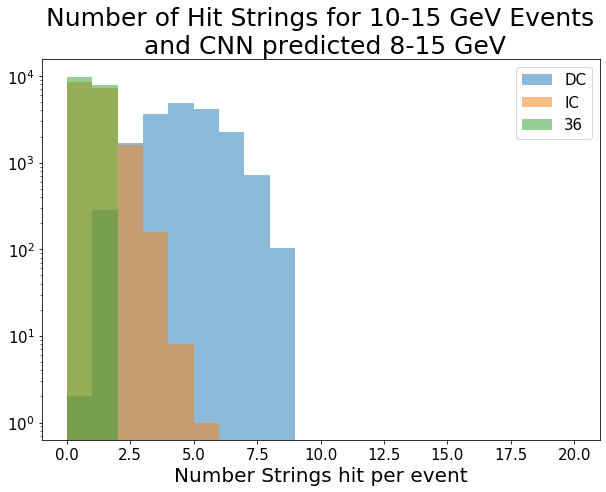

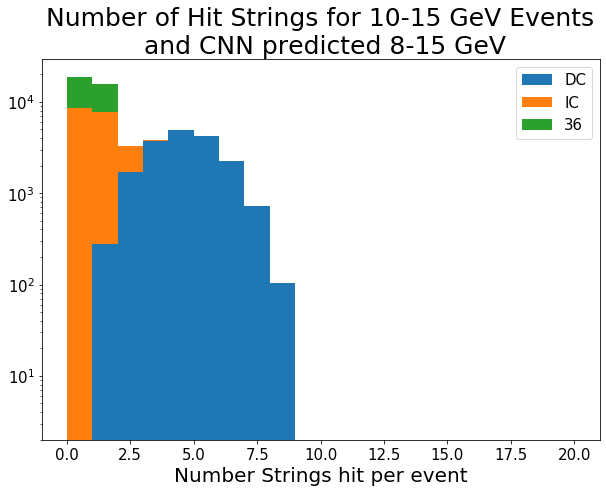

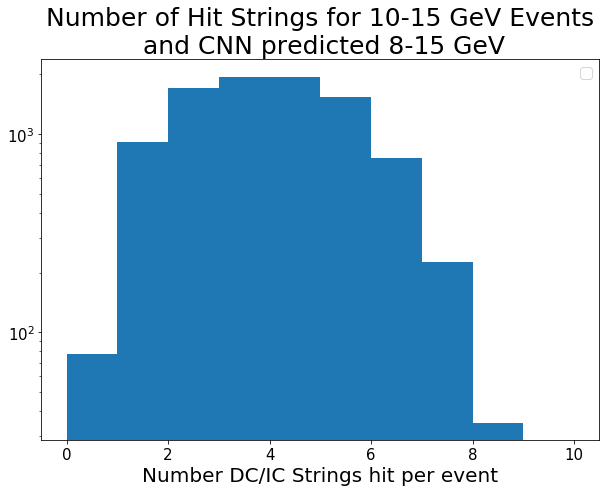

In [35]:
mask = true_1015 & cnn_815
title="Number of Hit Strings for 10-15 GeV Events\n and CNN predicted 8-15 GeV"
bins=20
amin=0
amax = 20
plt.figure(figsize=(10,7))
plt.hist(sum_strings_hit_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(sum_strings_hit_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(sum_strings_hit_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((sum_strings_hit_DC[mask],sum_strings_hit_IC[mask],sum_strings_hit_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(sum_strings_hit_DC[mask]/sum_strings_hit_IC[mask],bins=10,range=[amin,10],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DC/IC Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
No handles with labels found to put in legend.


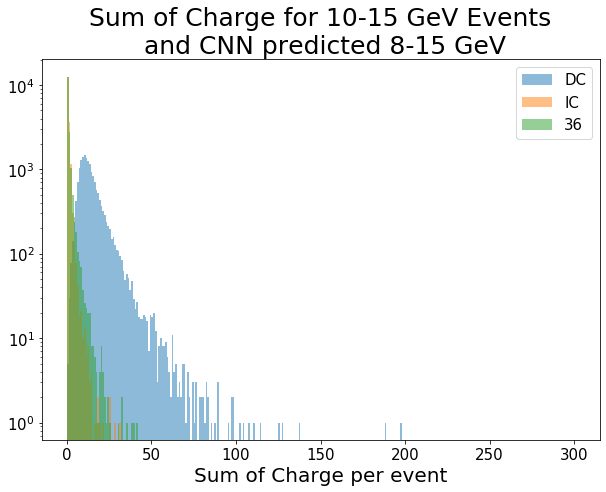

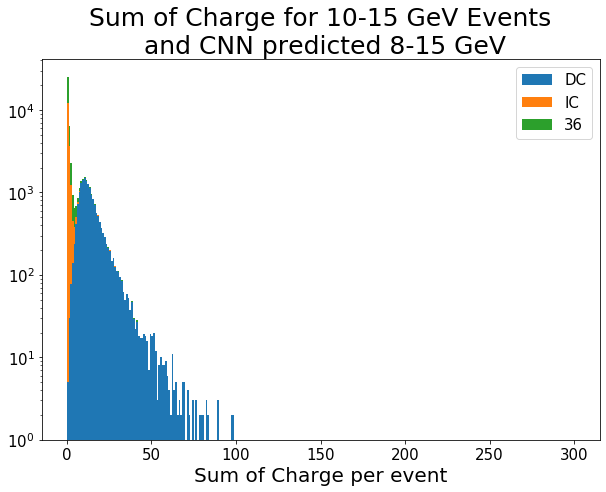

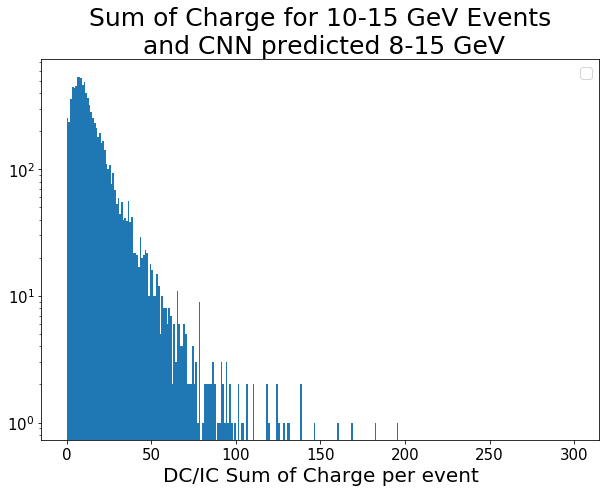

In [36]:
mask = true_1015 & cnn_815
title="Sum of Charge for 10-15 GeV Events\n and CNN predicted 8-15 GeV"
bins=300
amin=0
amax = 300
plt.figure(figsize=(10,7))
plt.hist(charge_sum_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(charge_sum_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(charge_sum_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((charge_sum_DC[mask],charge_sum_IC[mask],charge_sum_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(charge_sum_DC[mask]/charge_sum_IC[mask],bins=300,range=[amin,300],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("DC/IC Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# True Energy 8-15 GeV and CNN < 8 GeV

/mnt/home/micall12/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 8 Text yticklabel objects>)

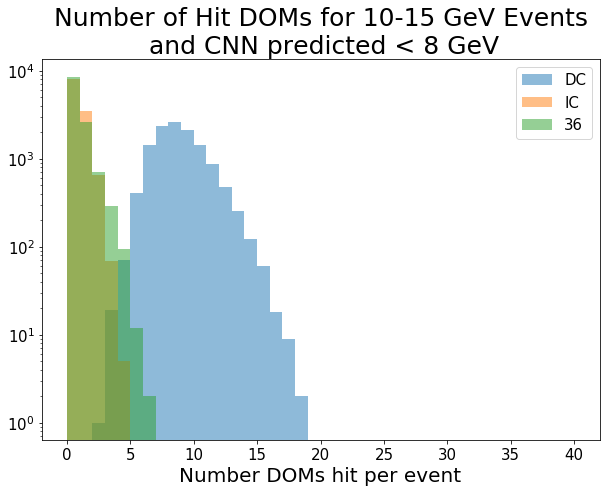

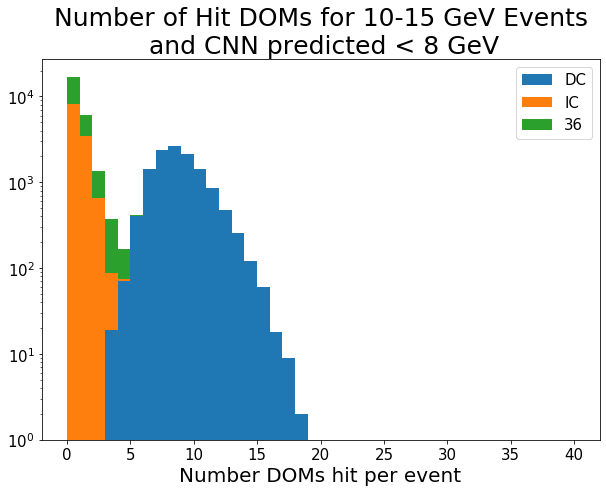

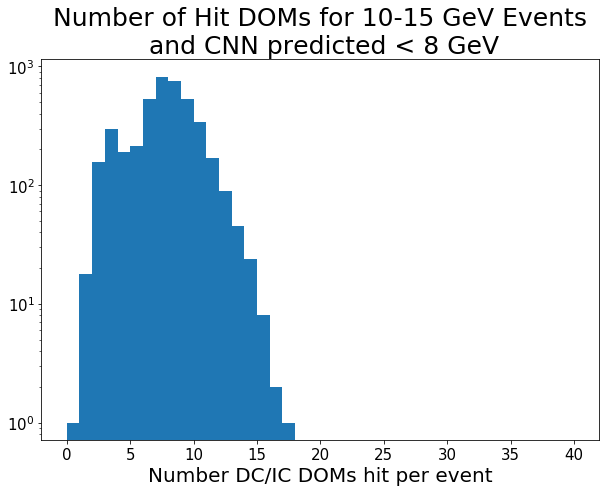

In [37]:
mask = true_1015 & cnn_lt8
title="Number of Hit DOMs for 10-15 GeV Events\n and CNN predicted < 8 GeV"
bins=40
amin=0
amax = 40
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((number_hits_DC[mask],number_hits_IC[mask],number_hits_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask]/number_hits_IC[mask],bins=40,range=[amin,40],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DC/IC DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=15)

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
 <a list of 8 Text yticklabel objects>)

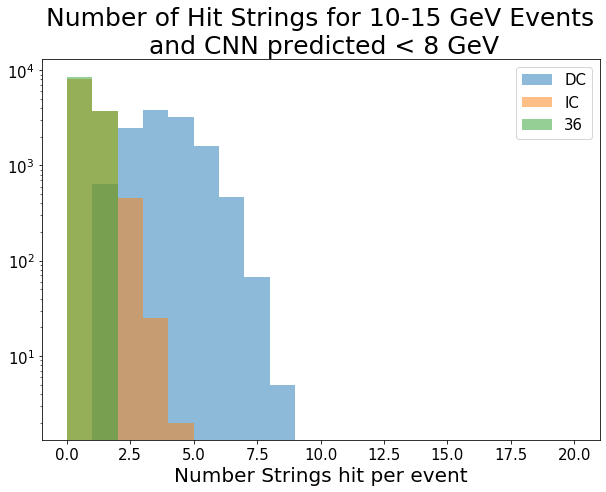

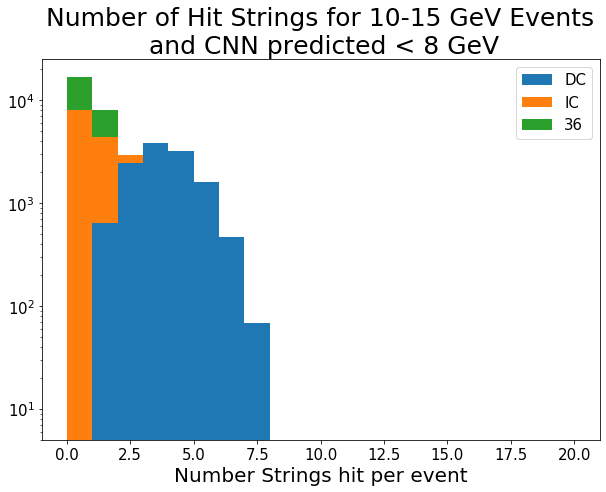

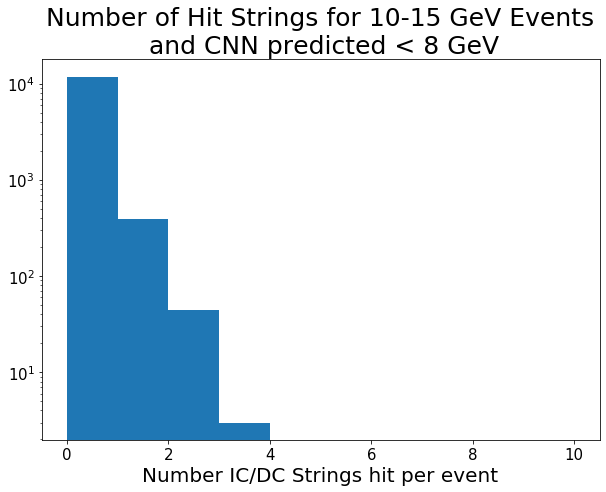

In [80]:
mask = true_1015 & cnn_lt8
title="Number of Hit Strings for 10-15 GeV Events\n and CNN predicted < 8 GeV"
bins=20
amin=0
amax = 20
plt.figure(figsize=(10,7))
plt.hist(sum_strings_hit_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(sum_strings_hit_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(sum_strings_hit_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((sum_strings_hit_DC[mask],sum_strings_hit_IC[mask],sum_strings_hit_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(sum_strings_hit_IC[mask]/sum_strings_hit_DC[mask],bins=10,range=[amin,10],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number IC/DC Strings hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=15)

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
 <a list of 8 Text yticklabel objects>)

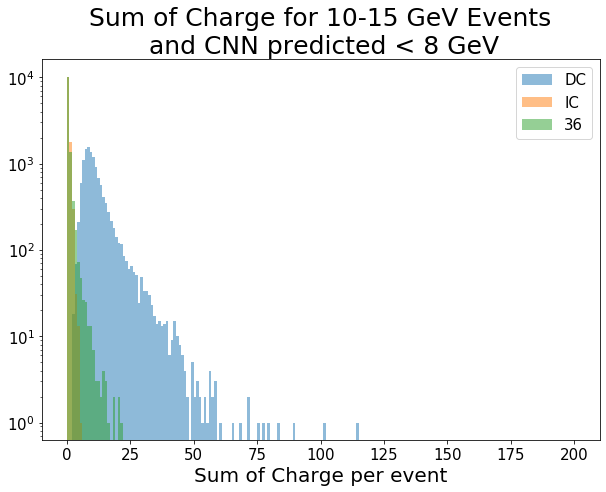

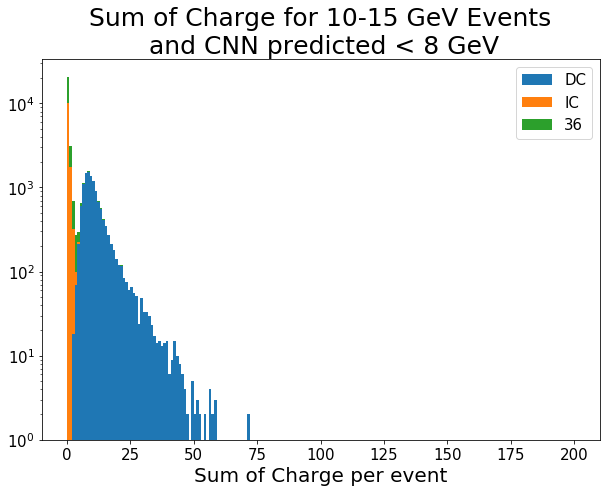

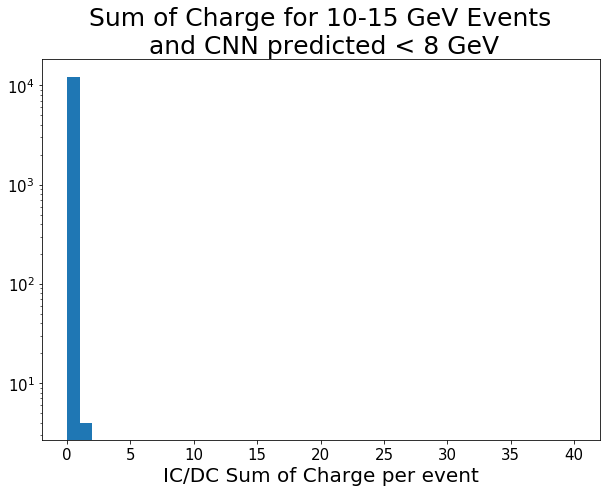

In [82]:
mask = true_1015 & cnn_lt8
title="Sum of Charge for 10-15 GeV Events\n and CNN predicted < 8 GeV"
bins=200
amin=0
amax = 200
plt.figure(figsize=(10,7))
plt.hist(charge_sum_DC[mask], label="DC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(charge_sum_IC[mask], label="IC",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(charge_sum_36[mask], label="36",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist((charge_sum_DC[mask],charge_sum_IC[mask],charge_sum_36[mask]), label=["DC","IC","36"],bins=bins,range=[amin,amax],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.figure(figsize=(10,7))
plt.hist(charge_sum_IC[mask]/charge_sum_DC[mask],bins=40,range=[amin,40],stacked=True)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("IC/DC Sum of Charge per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=15)

# Compare IC to itself

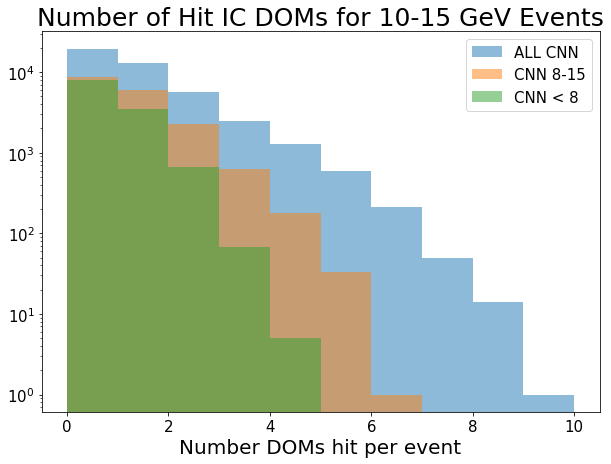

In [94]:
mask1 = true_1015
mask2 = true_1015 & cnn_815
mask3 = true_1015 & cnn_lt8
title="Number of Hit IC DOMs for 10-15 GeV Events"
bins=10
amin=0
amax = 10
plt.figure(figsize=(10,7))
plt.hist(number_hits_IC[mask1], label="ALL CNN",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask2], label="CNN 8-15",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_IC[mask3], label="CNN < 8",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# Compare DC to Itself

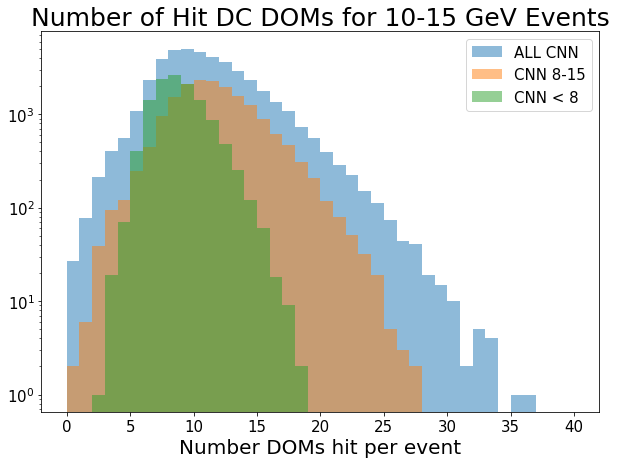

In [95]:
mask1 = true_1015
mask2 = true_1015 & cnn_815
mask3 = true_1015 & cnn_lt8
title="Number of Hit DC DOMs for 10-15 GeV Events"
bins=40
amin=0
amax = 40
plt.figure(figsize=(10,7))
plt.hist(number_hits_DC[mask1], label="ALL CNN",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_DC[mask2], label="CNN 8-15",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_DC[mask3], label="CNN < 8",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# Compare String 36 to Itself

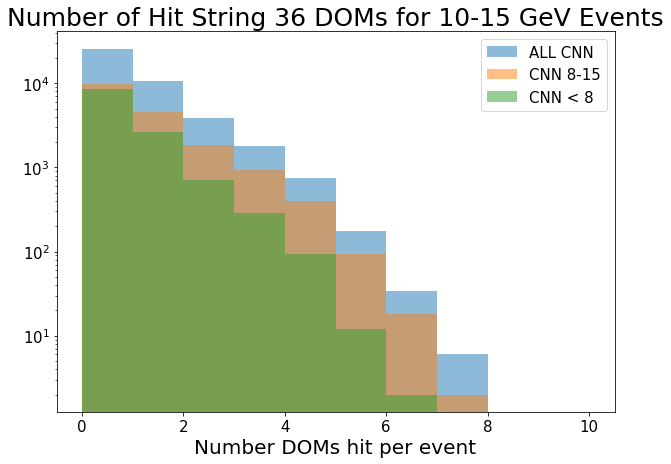

In [96]:
mask1 = true_1015
mask2 = true_1015 & cnn_815
mask3 = true_1015 & cnn_lt8
title="Number of Hit String 36 DOMs for 10-15 GeV Events"
bins=10
amin=0
amax = 10
plt.figure(figsize=(10,7))
plt.hist(number_hits_36[mask1], label="ALL CNN",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask2], label="CNN 8-15",bins=bins,range=[amin,amax],alpha=0.5)
plt.hist(number_hits_36[mask3], label="CNN < 8",bins=bins,range=[amin,amax],alpha=0.5)
plt.yscale("log")
plt.title("%s"%title,fontsize=25)
plt.xlabel("Number DOMs hit per event",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# Compare DC num hit doms to CNN energy

Text(0.5, 0, 'CNN Energy (GeV)')

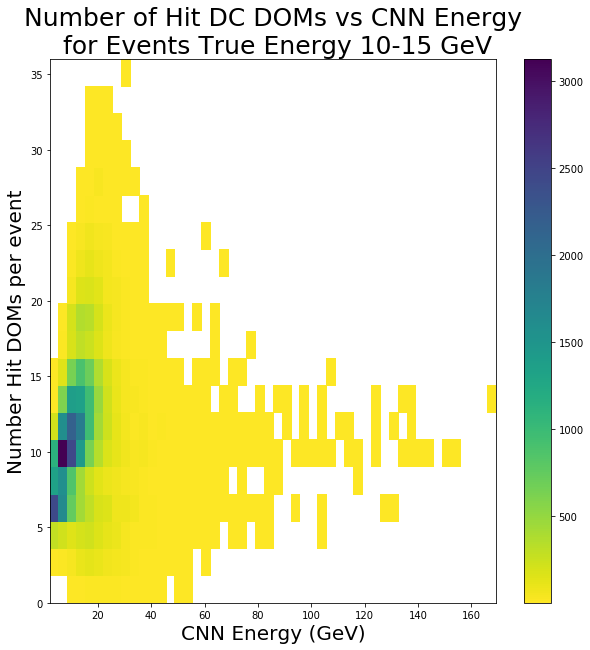

In [107]:
mask = true_1015
title="Number of Hit DC DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_DC[mask],bins=[50,20],cmap='viridis_r',cmin=0.0001)
cbat = plt.colorbar()
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

Text(0.5, 0, 'CNN Energy (GeV)')

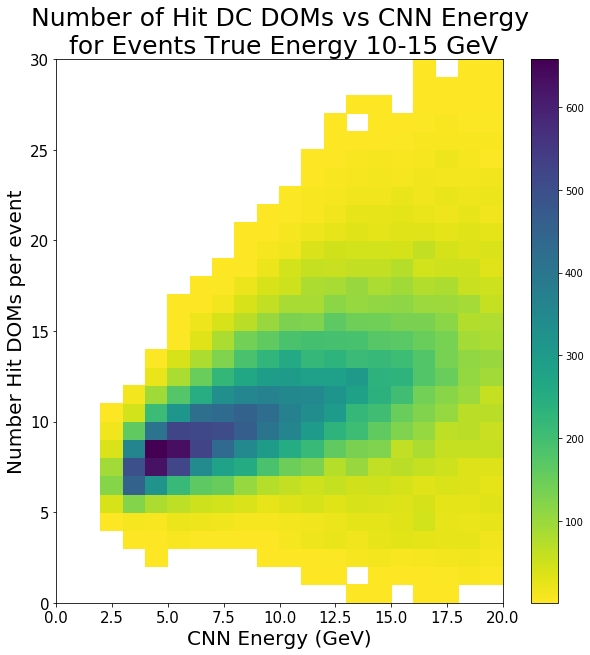

In [117]:
mask = true_1015
title="Number of Hit DC DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_DC[mask],bins=[20,30],range=[[0,20],[0,30]],cmap='viridis_r',cmin=0.0001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

# Compare IC num hit doms to CNN energy

Text(0.5, 0, 'CNN Energy (GeV)')

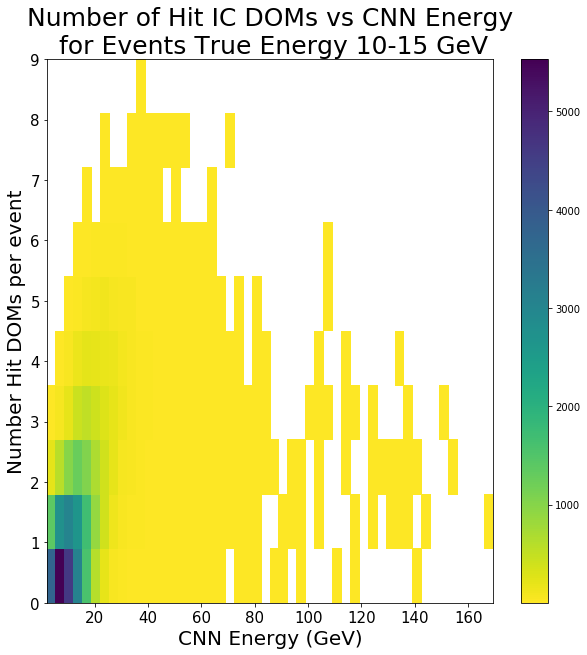

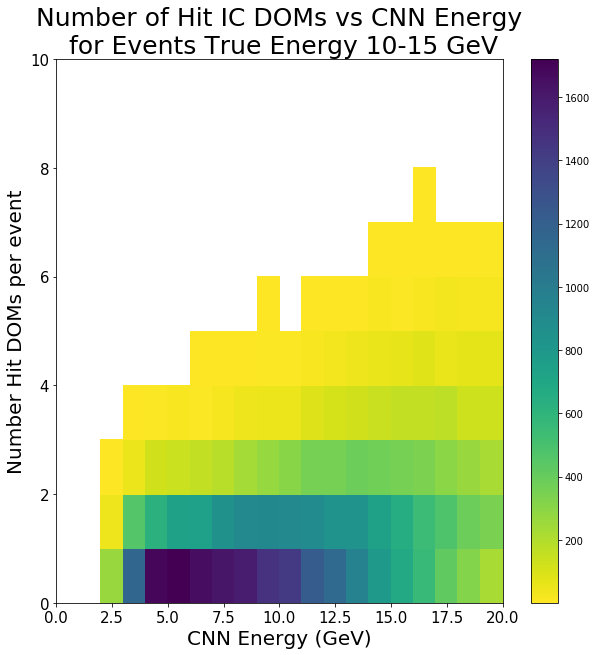

In [118]:
mask = true_1015
title="Number of Hit IC DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_IC[mask],bins=[50,10],cmap='viridis_r', cmin=0.0001) #norm=colors.LogNorm(),cmin=1.00001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

mask = true_1015
title="Number of Hit IC DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_IC[mask],bins=[20,10],range=[[0,20],[0,10]],cmap='viridis_r', cmin=0.0001) #norm=colors.LogNorm(),cmin=1.000001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

# Compare String 36 hit DOMs with cnn energy

Text(0.5, 0, 'CNN Energy (GeV)')

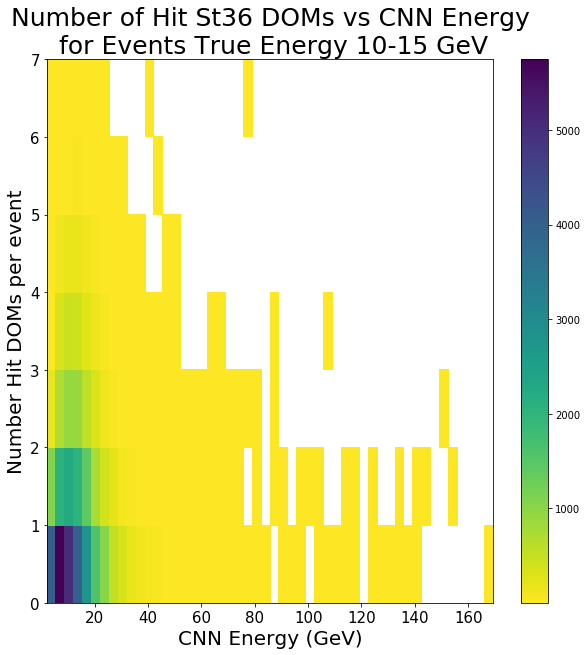

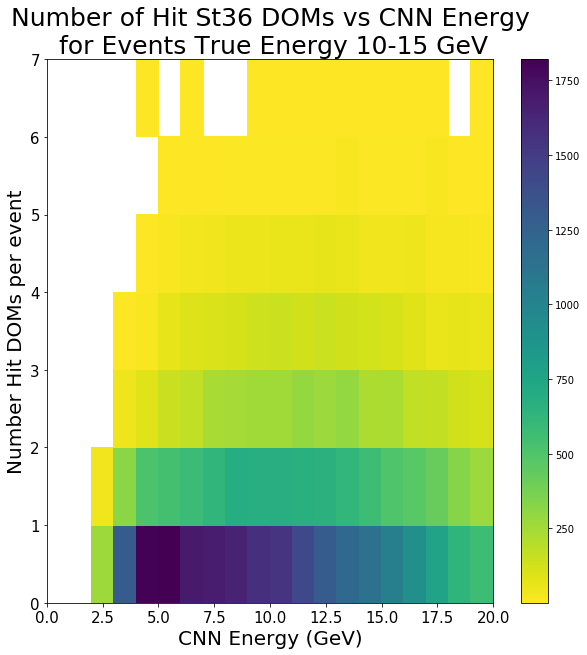

In [119]:
mask = true_1015
title="Number of Hit St36 DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_36[mask],bins=[50,7],cmap='viridis_r', cmin=0.0001) #norm=colors.LogNorm(),cmin=1.00001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)

mask = true_1015
title="Number of Hit St36 DOMs vs CNN Energy\n for Events True Energy 10-15 GeV"
plt.figure(figsize=(10,10))
plt.title("%s"%title,fontsize=25)
plt.hist2d(cnn_energy[mask],number_hits_36[mask],bins=[20,7],range=[[0,20],[0,7]],cmap='viridis_r', cmin=0.0001) #norm=colors.LogNorm(),cmin=1.000001)
cbat = plt.colorbar()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.yscale('log')
plt.ylabel("Number Hit DOMs per event",fontsize=20)
plt.xlabel("CNN Energy (GeV)",fontsize=20)